In [5]:
import torch
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import cv2
import os 
#from django.conf import settings

MODEL_TYPE = "vit_h"

In [6]:
import psutil

# Obtener el uso de RAM antes del procedimiento
ram_before = psutil.Process().memory_info().rss
#print("Uso de RAM antes del procedimiento:", ram_before)
ram_before = round(ram_before / (1024 * 1024 * 1024), 1)
print("Uso de RAM en GB antes del procedimiento:", ram_before)


#Funciona en local
sam = sam_model_registry[MODEL_TYPE](checkpoint="sam_vit_h_4b8939.pth")

#Funciona en PA
#sam = sam_model_registry[MODEL_TYPE](checkpoint="websam/notebooks/sam_vit_h_4b8939.pth")

# Obtener el uso de RAM después del procedimiento
ram_after = psutil.Process().memory_info().rss
#print("Uso de RAM después del procedimiento:", ram_after)
ram_after = round(ram_after / (1024 * 1024 * 1024), 1)
print("Uso de RAM en GB después del procedimiento:", ram_after)

# Calcular la diferencia de uso de RAM
ram_usage = ram_after - ram_before
#print("Uso de RAM durante el procedimiento:", ram_usage)
ram_usage = round(ram_usage / (1024 * 1024 * 1024), 1)
print("Uso de RAM en GB después del procedimiento:", ram_usage)

Uso de RAM en GB antes del procedimiento: 5.0
Uso de RAM en GB después del procedimiento: 7.4
Uso de RAM en GB después del procedimiento: 0.0


In [3]:
## print (os.path.realpath('.'))

In [8]:
import psutil

# Obtener el uso de RAM antes del procedimiento
ram_before = psutil.Process().memory_info().rss
print("Uso de RAM antes del procedimiento:", ram_before)

mask_generator = SamAutomaticMaskGenerator(sam)

#Funciona en local

#url_bgr = r"..\imagenes\imagen_bgr.jpg"
#url_rgb = r"..\imagenes\imagen_rgb.jpg"

url_bgr = r"..\..\static\images\imagenes\imagen_bgr.jpg"
url_rgb = r"..\..\static\images\imagenes\imagen_rgb.jpg"

#Funciona en entorno PA

#url_bgr = "websam\imagenes\imagen_bgr.jpg"
#url_rgb = "websam\imagenes\imagen_rgb.jpg"

image_bgr = cv2.imread(url_bgr)
image_rgb = cv2.imread(url_rgb)

## PRECAUNCIÓN CODIGO DE 5 MINUTOS!!!!!
result = mask_generator.generate(image_rgb)

# Obtener el uso de RAM después del procedimiento
ram_after = psutil.Process().memory_info().rss
print("Uso de RAM después del procedimiento:", ram_after)

# Calcular la diferencia de uso de RAM
ram_usage = ram_after - ram_before
print("Uso de RAM durante el procedimiento:", ram_usage)

Uso de RAM antes del procedimiento: 7945625600
Uso de RAM después del procedimiento: 6147362816
Uso de RAM durante el procedimiento: -1798262784


In [9]:
import supervision as sv

mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr, detections)

In [10]:
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

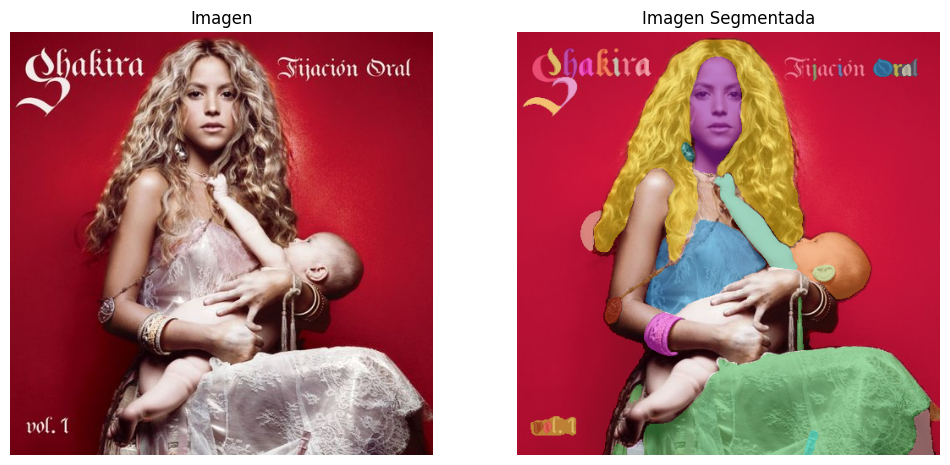

In [7]:
# sv.plot_images_grid(
#     images=[image_bgr, annotated_image],
#     grid_size=(1, 2),
#     titles=['Imagen', 'Imagen Segmentada']
# )

In [13]:
#Funciona
#ruta_guardado = "websam\img-segmentada\imagen_segmentada.png"

#Funciona en local
ruta_guardado = r"..\..\static\images\img-segmentada\imagen_segmentada.png"

In [14]:
cv2.imwrite(ruta_guardado,annotated_image)

True